In [170]:
import pandas as pd
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import math as math

In [171]:
Distancia = pd.read_csv("distancia.csv",sep=";")
Grados = pd.read_csv("grados.csv",sep=";")
Presion = pd.read_csv("presion.csv",sep=";")

In [172]:
distancia = Distancia["Distance"].to_numpy()
N1 = Distancia["N"].to_numpy()
grados = Grados["Degree"].to_numpy()
N2 = Grados["N"].to_numpy()
presion =Presion["Pressure"].to_numpy()
N3 = Presion["N"].to_numpy()

In [173]:
distancia,N2

(array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22], dtype=int64),
 array([  1,   4,   9,  15,  22,  33,  44,  55,  69,  85, 104, 115, 132,
        150, 167, 187, 204, 225, 240, 257], dtype=int64))

(0.351655579639734, -0.4895283653486744)

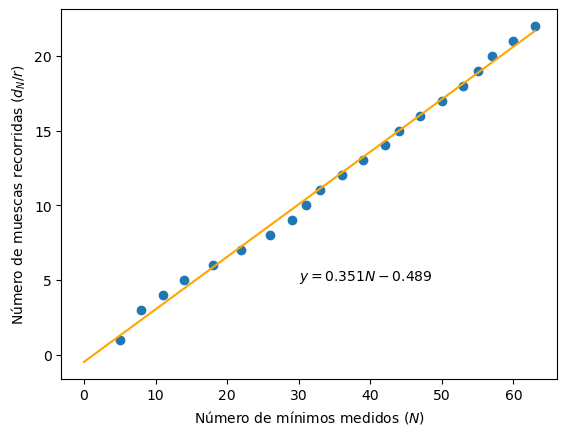

In [174]:
plt.scatter(N1,distancia)

a,b = np.polyfit(N1,distancia,1)
x = np.linspace(0,63)
y = a*x + b
plt.plot(x,y,"orange")
plt.xlabel(r"Número de mínimos medidos ($N$)")
plt.ylabel(r"Número de muescas recorridas ($d_N/r$)")
plt.text(30,5,r"$y= 0.351N -0.489$")
plt.savefig("distancia.pdf")
a,b

(0.06876740312895689, 3.2175320086434622)

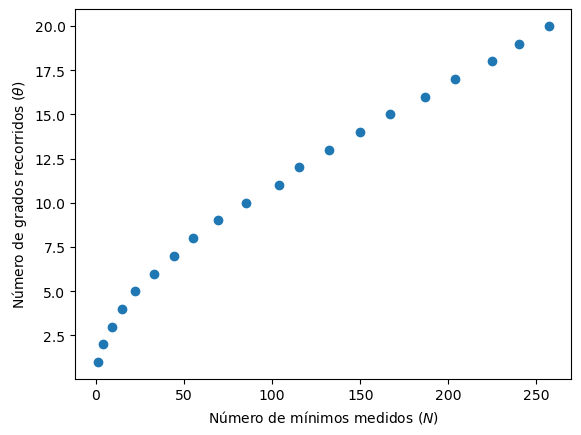

In [175]:
plt.scatter(N2,grados)

a,b = np.polyfit(N2,grados,1)
x = np.linspace(0,250)
y = a*x + b
#plt.plot(x,y,"orange")
plt.xlabel(r"Número de mínimos medidos ($N$)")
plt.ylabel(r"Número de grados recorridos ($\theta$)")
#plt.text(50,5,r"$y= %sN -%s$"%(round(a,3),round(b,3)))
plt.savefig("grados.pdf")
a,b

(2.907964053300278, 0.07065385807250557)

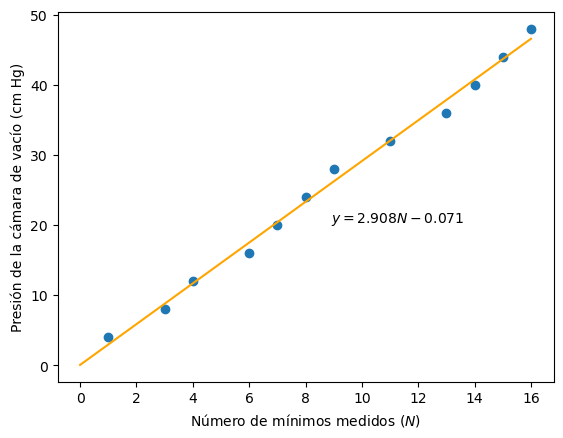

In [176]:
plt.scatter(N3,presion)

a,b = np.polyfit(N3,presion,1)
x = np.linspace(0,N3[-1])
y = a*x + b
plt.plot(x,y,"orange")
plt.xlabel(r"Número de mínimos medidos ($N$)")
plt.ylabel(r"Presión de la cámara de vacío (cm Hg)")
plt.text(np.mean(N3),np.mean(y)-3,r"$y= %sN -%s$"%(round(a,3),round(b,3)))
plt.savefig("presion.pdf")
a,b

In [177]:
t = 0.59e-2
lambda_ = 633e-9

eta_vidrio = ((2*t - N2*lambda_)*(1 - np.cos(np.pi*grados/180)))/(2*t*(1-np.cos(np.pi*grados/180))-N2*lambda_)
np.mean(eta_vidrio),np.std(eta_vidrio)



(1.4105157135242987, 0.08145592909663939)

In [178]:
slope = N3[-1]*lambda_/(2*3.21*(presion[-1]-presion[0]))
slope

3.585386576040781e-08

In [179]:
press = np.linspace(0,100)

In [184]:
y = slope*press +1 
y

array([1.        , 1.00000007, 1.00000015, 1.00000022, 1.00000029,
       1.00000037, 1.00000044, 1.00000051, 1.00000059, 1.00000066,
       1.00000073, 1.0000008 , 1.00000088, 1.00000095, 1.00000102,
       1.0000011 , 1.00000117, 1.00000124, 1.00000132, 1.00000139,
       1.00000146, 1.00000154, 1.00000161, 1.00000168, 1.00000176,
       1.00000183, 1.0000019 , 1.00000198, 1.00000205, 1.00000212,
       1.0000022 , 1.00000227, 1.00000234, 1.00000241, 1.00000249,
       1.00000256, 1.00000263, 1.00000271, 1.00000278, 1.00000285,
       1.00000293, 1.000003  , 1.00000307, 1.00000315, 1.00000322,
       1.00000329, 1.00000337, 1.00000344, 1.00000351, 1.00000359])

3.585386576040781e-08

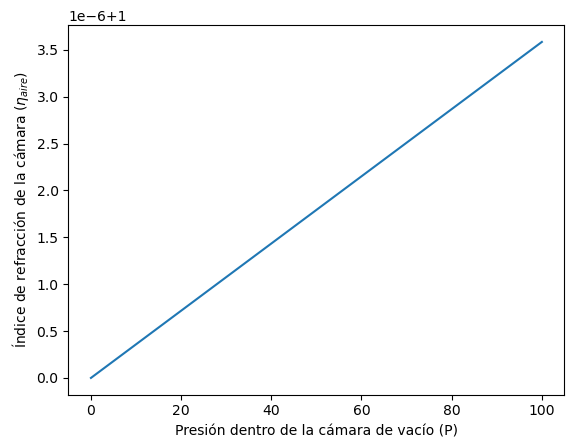

In [187]:
plt.plot(press,y)
plt.ylabel(r"Índice de refracción de la cámara ($\eta_{aire}$)")
plt.xlabel(r"Presión dentro de la cámara de vacío (P)")
plt.savefig("presion_n_refraccion.pdf")
slope